In [1]:
import sys
import seaborn as sns
import pandas as pd
import numpy as np
import multianndata as mad
import cna
import scanpy as sc
from matplotlib import pyplot as plt

In [2]:
# parameters
resolution = "major_cell_types"
analysis_name = "no_expr_pc_covars"
celltype = "B"

In [3]:
# read in the multi anndata with GeNA phenotype information 
madata = cna.read(
    f"/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/csa_qtl/output/multianndata/{resolution}/{analysis_name}/{celltype}_scDataObject.dimreduc.pca.gena_pheno.h5ad"
)

Only considering the two last: ['.gena_pheno', '.h5ad'].
Only considering the two last: ['.gena_pheno', '.h5ad'].


In [4]:
madata.obs

,id,sequencing_library,cohort,wg2_scpred_prediction,npheno_14:105840505:T:C,npheno_1:143272081:G:C,npheno_11:28430510:G:GC,npheno_13:112149033:C:CCCTGTGGAAGCCCTGACTCCCAGTGTGATAGTACCTGTGGAAACCCTGACCCCTGTGTGATGGTA,npheno_3:179121077:GC:G
AAACGAAGTTGAGGAC_S0056a,CPG248534,S0056a,BioHEART,B_naive,-0.069240,0.148393,-0.107242,-0.085650,-0.122159
AAACGAATCAGTCCGG_S0056a,CPG247858,S0056a,BioHEART,B_naive,0.021406,-0.023400,0.021884,0.060756,0.001806
AAACGAATCGCGATCG_S0056a,CPG247833,S0056a,BioHEART,B_intermediate,0.018794,0.014353,-0.001623,-0.037429,0.017746
AAACGCTTCTCCAAGA_S0056a,CPG249003,S0056a,BioHEART,B_naive,-0.079799,0.047564,-0.005480,0.014650,-0.036275
AAAGAACAGTGACACG_S0056a,CPG248708,S0056a,BioHEART,B_memory,0.030970,-0.024267,0.016113,-0.001417,-0.002684
...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTTCTAAC_S0176,CPG500082,S0176,BioHEART,B_naive,0.013704,-0.005871,0.017502,-0.002102,-0.008318
TTTGTTGCAACCAGAG_S0176,CPG500082,S0176,BioHEART,B_naive,-0.042709,0.020513,0.001671,0.045913,-0.014017
TTTGTTGCAGCACCCA_S0176,CPG500249,S0176,BioHEART,B_naive,0.037737,-0.046736,0.049403,0.051223,0.030035
TTTGTTGGTGTGATGG_S0176,CPG500082,S0176,BioHEART,B_naive,0.023910,-0.042656,0.044659,0.072050,0.016254


In [5]:
madata.obs.shape

(545589, 9)

/directflow/SCCGGroupShare/projects/blabow/.conda/envs/gena-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


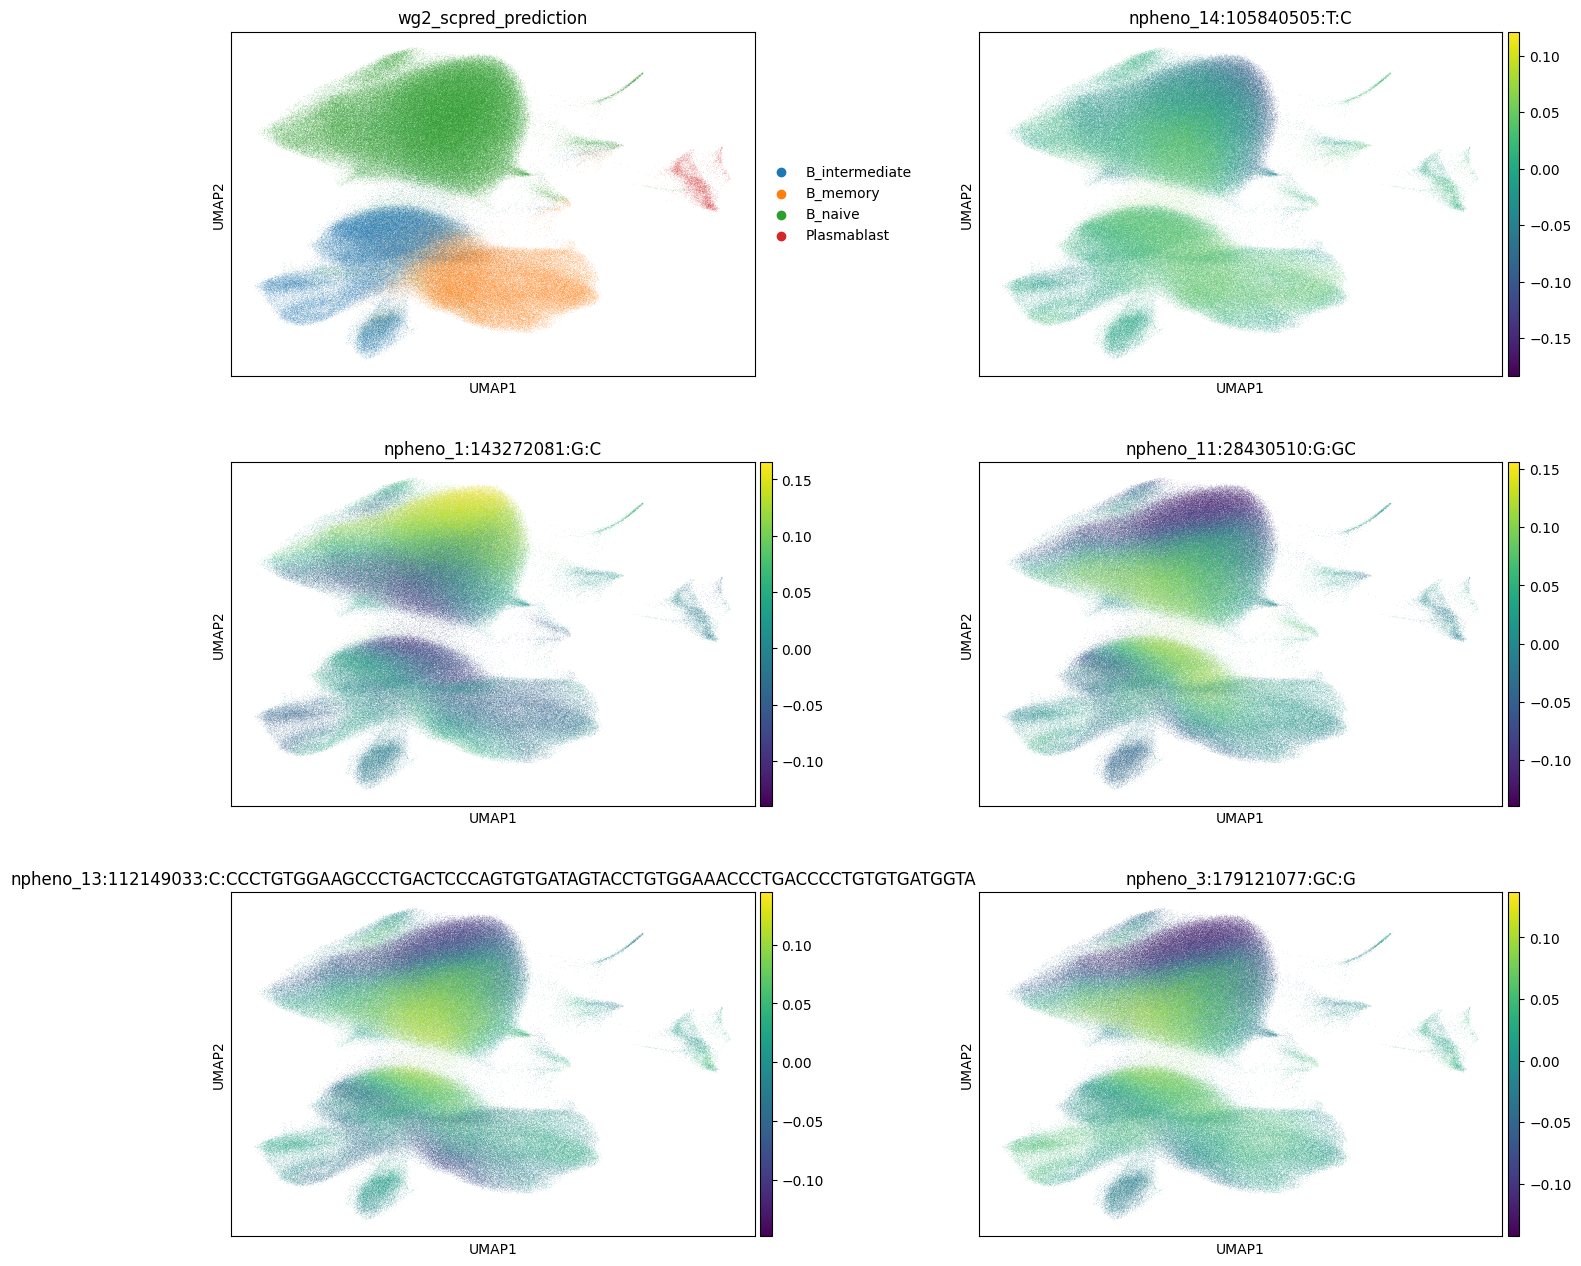

In [9]:
# plot neighbourhood abundance correllations

sc.pl.umap(
    madata,
    color=["wg2_scpred_prediction"] + madata.obs.columns[4:10].tolist(),
    wspace=0.3,
    ncols=2
)